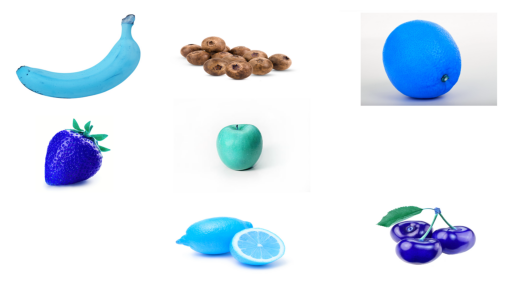

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Učitavanje slike
img = cv2.imread('static/voce_04.png')
plt.imshow(img)
plt.axis('off')
plt.show()

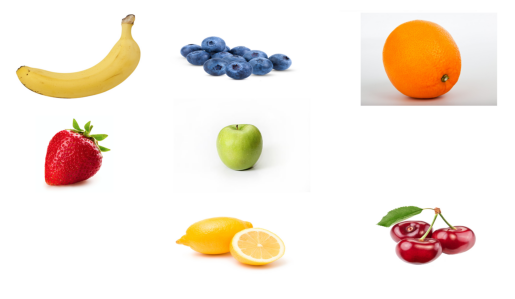

In [2]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV učitava slike kao BGR
plt.imshow(img)
plt.axis('off')
plt.show()

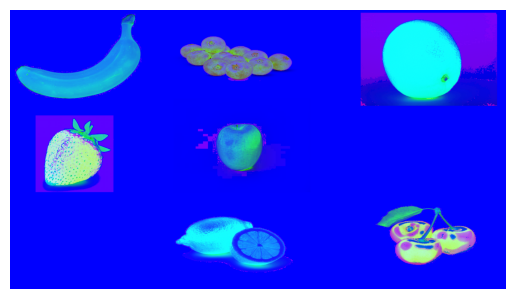

In [3]:
# Pretvorba u HSV (Hue, Saturation, Value) format
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(hsv)
plt.axis('off')
plt.show()

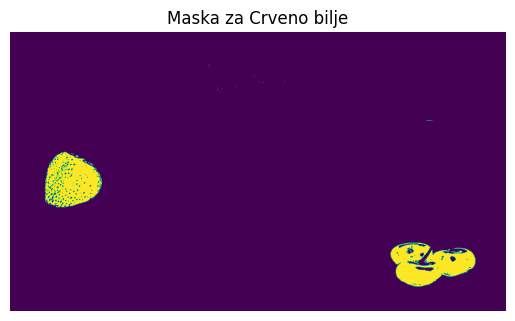

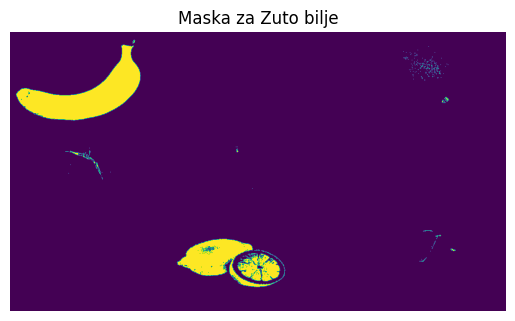

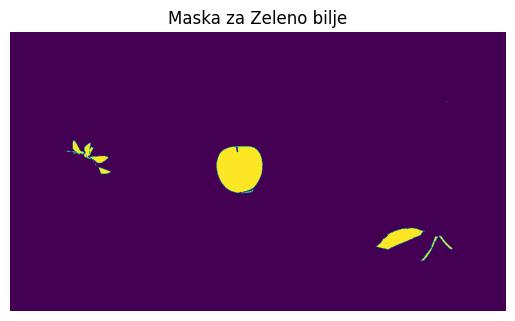

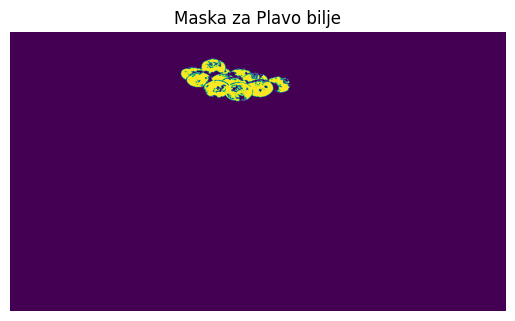

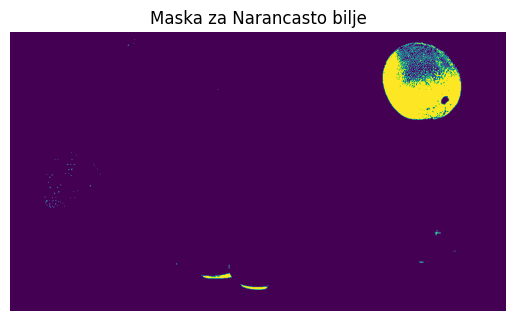

In [4]:
# Definicija raspona boja za različite objekte
color_ranges = {
    'Crveno bilje': ([160, 50, 50], [180, 255, 255]),
    'Zuto bilje': ([20, 100, 100], [30, 255, 255]),
    'Zeleno bilje': ([30, 50, 50], [70, 255, 255]),
    #'Ljubicasta': ([130, 50, 50], [160, 255, 255]),
    #'Smeđa': ([10, 100, 20], [20, 255, 200]),
    'Plavo bilje': ([90, 100, 100], [120, 255, 255]),
    'Narancasto bilje': ([10, 160, 160], [17, 255, 255])
}

slike =[]

# Detekcija objekata za svaku boju
for color, (lower, upper) in color_ranges.items():
    lower = np.array(lower)
    upper = np.array(upper)

    # Kreiranje maske za detekciju boje
    mask = cv2.inRange(hsv, lower, upper)
    slike.append(mask);
    
     # Detekcija kontura
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Crtanje pravokutnika oko detektiranih objekata
    for contour in contours:
        # Filtriranje malih kontura
        if cv2.contourArea(contour) > 500:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(img, color, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    
    # Prikaz maske za svaku boju
    plt.imshow(mask)
    plt.title(f'Maska za {color}')
    plt.axis('off')
    plt.show()

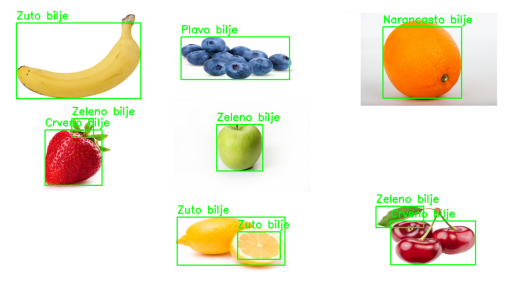

In [5]:
# Prikaz rezultata
plt.imshow(img)
plt.axis('off')
plt.show()